## ECMM444 Fundamentals of Data Science
## Course Assessment 2


This course assessment (CA2) represents 60% of the overall module assessment.

**Submission deadline:** 9 January 2023, 12noon

**Aim:** Show understanding of linear algebra methods for data analysis with `pandas` and `numpy`.

This is an **individual exercise** and your attention is drawn to the College and University guidelines on collaboration and plagiarism, which are available from the College website.


**Notes on how to use the notebook:**

1. do not change the name of this notebook, i.e. the notebook file has to be: `ca2.ipynb`
2. do not add you name or student code in the notebook or in the file name (it must be an anonymous submission)
3. do not remove or delete or add any cell in this notebook: you should work on a separate, private notebook and only when you are finished debugging then copy the function implementations in the cells of this notebook. Make sure to copy **only** the function implementation and nothing else.
4. remove the `raise NotImplementedError()` under the `# YOUR CODE HERE` and replace it with **your code**: note that if you leave this command in the cell you will fail the associated test

**Submission:**

- to access this notebook you have downloaded the archive ecmm444_ca2.zip, and unziped it to a folder ecmm444_ca2
- the folder ecmm444_ca2 contains some images (.png), a notebook (.ipynb) and some other files for the datasets
- to submit your completed Jupyter notebook, save it in the folder ecmm444_ca2 without changing the file name, i.e. the notebook has to have the file name ca2.ipynb
- create a .zip archive (not any other compression format, only .zip) of the folder ecmm444_ca2 with your updated notebook 
- submit a single file, the zipped archive, using the BART submission system  


**Evaluation criteria:**

Each question asks for one or more functions to be implemented. 

- Each function is awarded a number of marks. 
- A hidden unit test is going to evaluate if desired properties of the required function are met. 
- If the function passes the test the associated marks are awarded, if it fails 0 marks are awarded.
- The coding style (including clarity, conciseness, appropiate use of commands and data structures, efficiency, good programming practices) will also be kept into consideration to award full marks.  
- If you make a typo error (e.g. mispelling a variable) this will likely causes a syntax error, the function execution will fail and you will be awarded 0 marks.
- Do not make assumptions on the state of previous cells, i.e. expect each function to be evaluated independently, moreover expect each function to be tested in the unit tests on some *randomly* generated input.
- Notebooks not conforming to the required format (see notes on how to use the notebook) will be penalised.

Although the test use a hard fail/pass strategy to assign marks, the large number of questions allows a fine grading.

**Notes:**

Students are expected to do some autonomous readings and research to familiarise themselves with the topics of the exercises.

When a required function can be implemented directly by a library function it is intended that the candidate should write her own implementation of the function.

Students are not allowed to import additional external libraries unless explicitly stated in the question. 

Do not assume that the implementations provided in the Workshops exercises contain no mistakes. You should write and are ultimately responsible for the code that you submit in this assessment.

Questions are not strict software specifications. Students are expected to use their knowledge of the subject to interpret correctly the meaning of questions.


In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# the following is used in unit testing, please ignore 
import sys
sys.path.insert(0,'..\\..\\')

# Part 1 (30 marks)

**Aim:** Show competence in using the `pandas` library and knowledge of the correlation concept.

In the following you are asked to analyze a real world dataset: the Exasens Data Set from https://archive.ics.uci.edu/ml/datasets/Exasens which contains missing values.

In this exercise data matrices are considered row-wise, that is a data matrix for `m` instances is a `m x n` matrix consisting of `m` vectors in `n` dimensions.

## Question 1.1 (4 marks)

Make a function `load_exasens_data_set()` that returns a pandas data frame with the the data made available by the UC Irvine Machine Learning Repository at the following URL: https://archive.ics.uci.edu/ml/datasets/Exasens (click on the `data folder` link on that webpage - you need to find the exact URL for the data file in csv format).


The function should read the data directly from the URL (not from a location on the local disk) and  perform the necessary processing and manipulation of the raw data so as to output a data frame `df` with the following characteristics:
```
>>df.info()

RangeIndex: 399 entries, 0 to 398
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Diagnosis           399 non-null    object 
 1   ID                  399 non-null    object 
 2   Imaginary_Part_Min  100 non-null    float64
 3   Imaginary_Part_Avg  100 non-null    float64
 4   Real_Part_Min       100 non-null    float64
 5   Real_Part_Avg       100 non-null    float64
 6   Gender              399 non-null    int64  
 7   Age                 399 non-null    int64  
 8   Smoking             399 non-null    int64  
dtypes: float64(4), int64(3), object(2)
memory usage: 28.2+ KB
```
**Note:** you have to obtain a frame that has the **exact** column names as shown above.

In [2]:
def load_exasens_data_set():
    # extract from web
    df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00523/Exasens.csv').iloc[2:,:9]
    # change col names
    df = df.rename(columns = {'Imaginary Part':'Imaginary_Part_Min','Unnamed: 3':'Imaginary_Part_Avg',
    'Real Part':'Real_Part_Min','Unnamed: 5':'Real_Part_Avg'})
    # change dtypes
    df[[col for col in df.columns if 'Part' in col]] = df[[col for col in df.columns if 'Part' in col]].astype(float)
    df.iloc[:,-3:] = df.iloc[:,-3:].astype('int64')
    return df

In [ ]:
# This cell is reserved for the unit tests. Do not consider this cell. 

In [3]:
# Just run the following code, do not modify it
df = load_exasens_data_set()
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 399 entries, 2 to 400
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Diagnosis           399 non-null    object 
 1   ID                  399 non-null    object 
 2   Imaginary_Part_Min  100 non-null    float64
 3   Imaginary_Part_Avg  100 non-null    float64
 4   Real_Part_Min       100 non-null    float64
 5   Real_Part_Avg       100 non-null    float64
 6   Gender              399 non-null    int64  
 7   Age                 399 non-null    int64  
 8   Smoking             399 non-null    int64  
dtypes: float64(4), int64(3), object(2)
memory usage: 28.2+ KB
None


C:\Users\soura\AppData\Local\Temp\ipykernel_10000\1967353938.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.iloc[:,-3:] = df.iloc[:,-3:].astype('int64')


## Question 1.2 (5 marks)

Make a function `add_binned_column(df, col_name, limits)`. The function takes in input a data frame `df`, one of its columns label `col_name` and a list of values `limits`. 

The function returns the input data frame with an additional column: the label of the new column is obtained by adding the fixed suffix "_bin", so if col_name is "Age" then the new column has label "Age_bin". 

The aim of the function is to convert values into the ordinal integers 0,1,2,...,etc. 

The list `limits` contains the bins boundaries used for the conversion. The bins are closed on the left and open on the right, i.e. a bin with boundaries `[10,20)` contains all values >= 10 and < 20. 

In a list `[v, a, b, c, ..., w]` the first value `v` defines the bin (-inf,v) and the last value `w` defines the bin (w,+inf).

For example `limits=[5,10,15]` defines the following bins: `(-inf,5), [5,10), [10, 15), [15, +inf)`. Values falling in the first bin will be mapped to the integer 0, values in the second bin will be mapped to the integer 1,  in the third bin to 2, in the fourth bin to 3. 


In [4]:
def add_binned_column(df, col_name, limits):
    # adding -Inf & +Inf on both sides 
    limits_mod = [-np.Inf]+limits+[np.Inf]
    # creating labels
    labels = [i for i in range(len(limits_mod)-1)]
    # binning
    df[f'{col_name}_bin'] = pd.cut(df[col_name],bins=limits_mod,labels=labels,right=False)
    return df

In [ ]:
# This cell is reserved for the unit tests. Do not consider this cell. 

## Checkpoint

This is just a check-point, i.e. it is for you to see that you are correctly implementing all functions.

Execute the following code (just execute the next cell):
```
df = load_exasens_data_set()
df = add_binned_column(df, col_name='Age', limits=[30,50,70])
print(df[:5])
```
you should get:
```
  Diagnosis     ID  Imaginary_Part_Min  Imaginary_Part_Avg  Real_Part_Min  \
0      COPD  301-4             -320.61         -300.563531        -495.26   
1      COPD  302-3             -325.39         -314.750360        -473.73   
2      COPD  303-3             -323.00         -317.436056        -476.12   
3      COPD  304-4             -327.78         -317.399670        -473.73   
4      COPD  305-4             -325.39         -316.155785        -478.52   

   Real_Part_Avg  Gender  Age  Smoking  Age_bin  
0    -464.171991       1   77        2        3  
1    -469.263140       0   72        2        3  
2    -471.897667       1   73        3        3  
3    -468.856388       1   76        2        3  
4    -472.869783       0   65        2        2  
```

In [5]:
# Just run the following code, do not modify it

df = load_exasens_data_set()
df = add_binned_column(df, col_name='Age', limits=[30,50,70])
print(df[:5])

  Diagnosis     ID  Imaginary_Part_Min  Imaginary_Part_Avg  Real_Part_Min  \
2      COPD  301-4             -320.61         -300.563531        -495.26   
3      COPD  302-3             -325.39         -314.750360        -473.73   
4      COPD  303-3             -323.00         -317.436056        -476.12   
5      COPD  304-4             -327.78         -317.399670        -473.73   
6      COPD  305-4             -325.39         -316.155785        -478.52   

   Real_Part_Avg  Gender  Age  Smoking Age_bin  
2    -464.171991       1   77        2       3  
3    -469.263140       0   72        2       3  
4    -471.897667       1   73        3       3  
5    -468.856388       1   76        2       3  
6    -472.869783       0   65        2       2  


C:\Users\soura\AppData\Local\Temp\ipykernel_10000\1967353938.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.iloc[:,-3:] = df.iloc[:,-3:].astype('int64')


## Question 1.3 (4 marks)

Make a function `add_class(df, col_name)` to return a data frame with an added new column with fixed label of "target".

The function considers the distinct categorical values present in the column with label `col_name` in the input data frame `df` and maps them to integers.

For example, if the input data frame `df` has a column with label `Diagnosis` with values `[COPD, COPD, HC, Asthma, HC, COPD]`, by calling `df = add_class(df, col_name='Diagnosis')` then the new column `target` in the output dataframe will have values `[0,0,1,2,1,0]`.

In [6]:
def add_class(df, col_name):
    # how many unique values are there in the column?
    unique_cols = df[col_name].drop_duplicates().to_list()
    # create as many labels as unique values
    labels = [i for i in range(len(unique_cols))]
    # create mapping df --> Diagnosis:Target
    mapping = pd.DataFrame(list(zip(unique_cols,labels)),columns = ['Diagnosis','target'])
    return pd.merge(df,mapping,how='inner',on='Diagnosis')

In [ ]:
# This cell is reserved for the unit tests. Do not consider this cell. 

## Question 1.4 (6 marks)

Make a function `replace_missing_with_conditional_mean(df, condition_cols, cols)` to replace the missing values present in columns with labels in the list `cols`. This function must not change the input dataframe, and return a new dataframe.

The value to be replaced is computed as the mean of the non missing values of the corresponding group. Groups are formed based on the values in the columns with labels in the list `condition_cols`. 


For example if you have the following data frame `df`:
```
  Col1 Col2  Col3
0    A    c   1.0
1    A    c   3.0
2    B    c   5.0
3    A    d   6.0
4    A    c   NaN
```
then applying `replace_missing_with_conditional_mean(df, condition_cols=['Col1','Col2'], cols=['Col3'])` should yield in output
```
  Col1 Col2  Col3
0    A    c   1.0
1    A    c   3.0
2    B    c   5.0
3    A    d   6.0
4    A    c   2.0
```
this is because the record on line 4 belongs to the group `A c` that has a mean of `(1+3)/2 = 2`.

In [7]:
def replace_missing_with_conditional_mean(df, condition_cols, cols):
    # Create copy of data
    df_copy = df.copy()
    # replace with means
    df_copy[cols]=df_copy.groupby(condition_cols, group_keys=False)[cols].apply(lambda x: x.fillna(x.mean()))
    return df_copy

In [ ]:
# This cell is reserved for the unit tests. Do not consider this cell. 

### Question 1.5 (3 marks)

Make a function `standardize(df, cols)` that outputs a data frame where the values for the columns with labels in the list `cols` have been standardized, that is, they have been processed to have zero mean and standard deviation of 1.

In [8]:
def standardize(df, cols):
    # Create copy of data
    df_copy = df.copy()
    # standardize the required columns
    for col in df_copy[cols]:
        df_copy[col] = (df_copy[col] - np.mean(df_copy[col]))/np.std(df_copy[col])
    return df_copy

In [ ]:
# This cell is reserved for the unit tests. Do not consider this cell. 

## Question 1.6 (3 marks)

Make a function `make_correlation_matrix_from(df, cols)` to output a numpy array containing the correlation matrix relative to the data in the input data frame `df`. The data is extracted from the columns with labels in `cols`.

For example if you have the following data frame `df`:

```
  Col1 Col2  Col3
0    5    1     1
1    4    2     3
2    3    4     5
3    5    2     6
4    2    3     2
```

`C = make_correlation_matrix_from(df, ['Col2', 'Col3'])` will return the correlation matrix `C` of the data matrix:

```
1     1
2     3
4     5
2     6
3     2
```

Provide your own implementation of the correlation. Do **not** use functions from the numpy library or any other library to compute directly the correlation matrix.

In [9]:
def make_correlation_matrix_from(df, cols):
    df_copy = df.copy()
    # create an i.d. matrix
    corr_mat = np.eye(len(cols))
    # iterate thru the df
    for idx_1 , col_1 in enumerate(df_copy[cols]):
        for idx_2 , col_2 in enumerate(df_copy[cols]):# here a double pass is being made. think of optimizing it. (use trianular matrix then transpose and add?)
            x = np.array(df_copy[col_1])
            y = np.array(df_copy[col_2])
            # corr coeff 
            corr = np.sum((x-np.mean(x))*(y-np.mean(y)))/np.sqrt(np.sum((x-np.mean(x))**2)*np.sum((y-np.mean(y))**2))
            corr_mat[idx_1][idx_2] = np.round(corr,2)
    return corr_mat

In [ ]:
# This cell is reserved for the unit tests. Do not consider this cell. 

## Question 1.7 (2+3 mark)

Make a function `plot_corr(corr, labels)` to plot a correlation matrix `corr` (with variable names given as a list of strings in `labels`) (2 marks).


When you execute the following sequence of tranformations
```python
df = load_exasens_data_set()
df = add_binned_column(df, col_name='Age', limits=[30,50,60])
df = add_class(df, col_name='Diagnosis')
df = replace_missing_with_conditional_mean(df, condition_cols=['Smoking','Gender','Age_bin'], cols=['Imaginary_Part_Min','Imaginary_Part_Avg','Real_Part_Min', 'Real_Part_Avg'])
df = standardize(df, cols=['Imaginary_Part_Min','Imaginary_Part_Avg','Real_Part_Min', 'Real_Part_Avg','Gender','Age','Smoking'])
corr =  make_correlation_matrix_from(df, cols=['Imaginary_Part_Min','Imaginary_Part_Avg','Real_Part_Min', 'Real_Part_Avg','Gender','Age','Smoking'])
plot_corr(corr, labels=['Imaginary_Part_Min','Imaginary_Part_Avg','Real_Part_Min', 'Real_Part_Avg','Gender','Age','Smoking'])
```
you should obtain (3 marks):
<img src='corr.png' width="500">

In [10]:
def plot_corr(C, labels):
    fig , ax = plt.subplots()
    ax.imshow(
        C, 
        cmap = 'coolwarm_r',
        interpolation='nearest'
    )
    ax.set_xticks([0,1,2,3,4,5,6]);
    ax.set_yticks([0,1,2,3,4,5,6]);
    ax.set_xticklabels(labels,rotation=90);
    ax.set_yticklabels(labels);

    for i in range(C.shape[0]):
        for j in range(C.shape[1]):
            ax.text(j, i, "{:.2f}".format(C[i,j]), ha="center", va="center", fontsize=7);

In [ ]:
# This cell is reserved for the unit tests. Do not consider this cell. 

In [ ]:
# This cell is reserved for the unit tests. Do not consider this cell. 

In [11]:
# Just run the following code, do not modify it

df = load_exasens_data_set()
df = add_binned_column(df, col_name='Age', limits=[30,50,60])
df = add_class(df, col_name='Diagnosis')
df = replace_missing_with_conditional_mean(df, condition_cols=['Smoking','Gender','Age_bin'], cols=['Imaginary_Part_Min','Imaginary_Part_Avg','Real_Part_Min', 'Real_Part_Avg'])
df = standardize(df, cols=['Imaginary_Part_Min','Imaginary_Part_Avg','Real_Part_Min', 'Real_Part_Avg','Gender','Age','Smoking'])
corr =  make_correlation_matrix_from(df, cols=['Imaginary_Part_Min','Imaginary_Part_Avg','Real_Part_Min', 'Real_Part_Avg','Gender','Age','Smoking'])
plot_corr(corr, labels=['Imaginary_Part_Min','Imaginary_Part_Avg','Real_Part_Min', 'Real_Part_Avg','Gender','Age','Smoking'])

C:\Users\soura\AppData\Local\Temp\ipykernel_10000\1967353938.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.iloc[:,-3:] = df.iloc[:,-3:].astype('int64')


# Part 2 (40 marks)

**Aim:** Show an understanding of the main concepts in linear algebra such as PCA and SVD.


In this exercise data matrices are considered row-wise, that is a data matrix for `m` instances is a `m x n` matrix consisting of `m` vectors in `n` dimensions.

## Question 2.1 (3 marks)

Write the function `mu, cov = get_mean_cov(X)` that takes a `m x n` data matrix `X` in input and returns the mean vector `mu` as a one dimensional numpy vector of size `n` and the covariance matrix `cov` as a numpy matrix object of size `n x n`.

Provide your own implementation of the covariance. Do **not** use functions from the numpy library or any other library to compute directly the covariance matrix.

In [12]:
def get_mean_cov(X):
    # reference -> solutions to ECMM444 workshop question
    mu = np.mean(X, axis=0)
    Xc = np.mat(X - mu.reshape(1,-1))
    cov = Xc.T*Xc/(Xc.shape[0]-1)
    return mu, cov

In [ ]:
# This cell is reserved for the unit tests. Do not consider this cell. 

## Question 2.2 (7 marks)

Write your own code to perform the PCA dimensionality reduction (i.e. do not use functions provided by the `scikit` library, such as `sklearn.decomposition.PCA` or any other library that computes the PCA directly).

Write a function `D = PCA(X, n_dim=2)` that takes in input a `m x n` data matrix consisting of `m` vectors in `n` dimensions and returns the **centred** projection of `X` on the `n_dim` principal components as a `m x n_dim` data matrix `D`.

In [13]:
def PCA(X, n_dim=2):
    # reference -> taken from ECMM444 lecture code
    
    # center data matrix
    Xn = np.mat(X - np.mean(X, axis=0))
    # svd of data matrix
    U,s,Vt = np.linalg.svd(Xn)
    V = Vt.T
    # transformed & truncated data matrix 
    X_pca = Xn*V[:,:n_dim]
    return X_pca

In [ ]:
# This cell is reserved for the unit tests. Do not consider this cell. 

In [ ]:
# This cell is reserved for the unit tests. Do not consider this cell. 

## Question 2.3 (3 mark)

Write a function `plot(X, y=None)` that exploits the PCA function to plot a two dimensional projection of the input `m x n` data matrix `X` and that,  if available, uses the numerical array `y` to determine the colors of the points (following Matplotlib convention). 

In [18]:
def plot(X,y=None):
    # take X - reduce to 2 dim via the PCA function
    X_pca = PCA(X,n_dim=2)
    # break into axes
    x1 = np.array(X_pca[:,0]).reshape(-1,)
    x2 = np.array(X_pca[:,1]).reshape(-1,)
    fig , ax = plt.subplots(figsize = (5,5))
    ax1 = ax.scatter(-x1,x2,c=y); # why do i need to flip x axis to get similar representation? anything wrong / inverted in the upstream code? check!
    ax.grid();
    ax.set_ybound(-390,390);

In [ ]:
# This cell is reserved for the unit tests. Do not consider this cell. 

## Checkpoint

This is just a check-point, i.e. it is for you to see that you are correctly implementing all functions.

Execute the following code (just execute the next cell):
```
df = load_exasens_data_set()
df = add_binned_column(df, col_name='Age', limits=[30,50,60])
df = replace_missing_with_conditional_mean(df, condition_cols=['Smoking','Gender','Age_bin'], cols=['Imaginary_Part_Min','Imaginary_Part_Avg','Real_Part_Min', 'Real_Part_Avg'])
cols=['Imaginary_Part_Min','Imaginary_Part_Avg','Real_Part_Min', 'Real_Part_Avg']
X = np.mat(df[cols].values)
plot(X,y=None)
```
you should get something like

<img src='plot1.png' width=500>

C:\Users\soura\AppData\Local\Temp\ipykernel_10000\1967353938.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.iloc[:,-3:] = df.iloc[:,-3:].astype('int64')


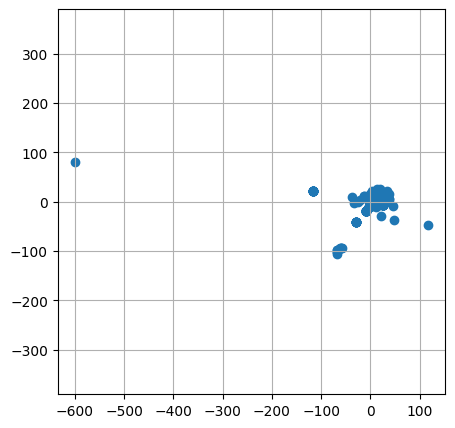

In [19]:
# Just run the following code, do not modify it

df = load_exasens_data_set()
df = add_binned_column(df, col_name='Age', limits=[30,50,60])
df = replace_missing_with_conditional_mean(df, condition_cols=['Smoking','Gender','Age_bin'], cols=['Imaginary_Part_Min','Imaginary_Part_Avg','Real_Part_Min', 'Real_Part_Avg'])
cols=['Imaginary_Part_Min','Imaginary_Part_Avg','Real_Part_Min', 'Real_Part_Avg']
X = np.mat(df[cols].values)
plot(X,y=None)

## Question 2.4 (7 marks)

Write a function `Z = approximate(X, r)` that returns the rank `r` approximation of the input data matrix `X`, i.e. for a `m x n` input matrix `X` returns a `m x n` matrix `Z` that has rank `r`.

In [20]:
def approximate(X, r):
    # References
    # 1. https://www.cs.princeton.edu/~smattw/Teaching/Fa19Lectures/lec11/lec11.pdf
    # 2. ECMM444 lecture code
    
    # First compute SVD
    Xn = np.mat(X)
    # svd of data matrix
    U,s,Vt = np.linalg.svd(Xn)
    V = Vt.T
    # use first r columns of U and V and the first r singular values in sigma (s)
    U_r = U[:,:r]
    V_r = V[:,:r]
    s_r = np.diag(s[:r])

    # build matrix
    return U_r*s_r*V_r.T

In [ ]:
# This cell is reserved for the unit tests. Do not consider this cell. 

## Question 2.5 (5 marks)

Write a function `err = approximation_error(X, r)` that returns an array `err` whose entries are the lenghts of the difference vector between the instances (rows) in the input data matrix `X` and the corresponding rows of the approximated matrix of rank `r`. When `X` is a `m x n` data matrix, the output `err` is a one dimensional array of size `m`.

In [21]:
def approximation_error(X,r):
    # get approx X
    approx_X = approximate(X,r)
    # calculate difference
    diff = X-approx_X
    # root-sum squared error
    return np.array(np.sqrt(np.sum(np.square(diff),axis = 1))).reshape(-1,)

In [ ]:
# This cell is reserved for the unit tests. Do not consider this cell. 

## Checkpoint

This is just a check-point, i.e. it is for you to see that you are correctly implementing all functions.

Execute the following code (just execute the next cell):
```
df = load_exasens_data_set()
df = add_binned_column(df, col_name='Age', limits=[30,50,60])
df = replace_missing_with_conditional_mean(df, condition_cols=['Smoking','Gender','Age_bin'], cols=['Imaginary_Part_Min','Imaginary_Part_Avg','Real_Part_Min', 'Real_Part_Avg'])
cols=['Imaginary_Part_Min','Imaginary_Part_Avg','Real_Part_Min', 'Real_Part_Avg']
X = np.mat(df[cols].values)
err = approximation_error(X, r=2)
err[:10]
```
you should get:

```
array([13.75510646,  5.3280034 ,  6.62261241,  4.78407324,  4.83648016,
       17.40768544,  3.46226262,  0.24898097,  5.35576819,  5.86906756])
```

In [22]:
# Just run the following code, do not modify it

df = load_exasens_data_set()
df = add_binned_column(df, col_name='Age', limits=[30,50,60])
df = replace_missing_with_conditional_mean(df, condition_cols=['Smoking','Gender','Age_bin'], cols=['Imaginary_Part_Min','Imaginary_Part_Avg','Real_Part_Min', 'Real_Part_Avg'])
cols=['Imaginary_Part_Min','Imaginary_Part_Avg','Real_Part_Min', 'Real_Part_Avg']
X = np.mat(df[cols].values)
err = approximation_error(X, r=2)
err[:10]

C:\Users\soura\AppData\Local\Temp\ipykernel_10000\1967353938.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.iloc[:,-3:] = df.iloc[:,-3:].astype('int64')


array([13.75510646,  5.3280034 ,  6.62261241,  4.78407324,  4.83648016,
       17.40768544,  3.46226262,  0.24898097,  5.35576819,  5.86906756])

## Question 2.6 (5 mark)

Write a function `Z = replace_missing_with_approximation(X, is_missing, r)` that receives in input a `m x n` data matrix `X` and a boolean array `is_missing` of size `m` and a desired rank `r`. The function computes a rank `r` approximation of `X` and replaces the vectors (rows) of `X` with the corresponding approximated vectors when the corresponding position in the boolean array `is_missing` contains `True`. The function should not change the input matrix `X`. The output data matrix `Z` has the same shape of the input data matrix `X`.

In [24]:
def replace_missing_with_approximation(X, is_missing, r):
    # Create copy of data
    X_copy = X.copy()
    # Get low rank approximation
    low_rank_mat = approximate(X,r)
    # according to is_missing array, swap out rows for low-rank approximations
    for idx, conditional in enumerate(is_missing):
        if conditional: # replace if is_missing is true
            X_copy[idx,:] = low_rank_mat[idx,:]
    return X_copy

In [ ]:
# This cell is reserved for the unit tests. Do not consider this cell. 

## Question 2.7 (10 marks)


Write a function `Xp, yp = remove_outliers(X, y, threshold)` that receives in input a `m x n` data matrix `X` and a class vector `y` of size `m` and outputs a data matrix `Xp` and a class vector `yp`. The entries of the class vector indicate the class of each instance (row) of `X`. Let `Xi` be the (sub-)data matrix relative to class `i`. The `remove_outliers` function computes the Mahalanobis distance of each vector in `Xi` with respect to the multivariate probability distribution that can be inferred from all the vectors in `Xi`. Only the vectors with a distance strictly inferior than the provided numerical parameter `threshold` are kept in the output marix `Xp`, i.e. the `remove_outliers` function removes the instances that have a large mahalanobis distance within each class. 

Note that the order of the vectors (rows) in `X` is not necessarily related to the order of the vectors (rows) in `Xp`. 
But the entries in `Xp` and `yp` must be aligned (i.e. the class of the row vector `Xp[j]` with row index `j` is `yp[j]`).

In [25]:
def remove_outliers(X, y, threshold):
    # init empty dict to unwrap vectors into for easier handling - perhaps not the most efficient way to do it!
    dict_of_vecs = dict((dictcls, []) for dictcls in set(y))
    # init another empty dict to store the vecs that meet the threshold criteria 
    dict_of_threshold_vecs = dict((dictcls, []) for dictcls in set(y))

    # populate dict of vecs - store target as key, store vec as value
    for idx, cls in enumerate(y):
        dict_of_vecs[cls].append(np.array(X[idx]).reshape(-1,))

    # compute outliers
    for cls in dict_of_vecs:
        # convert to matrix form
        dict_of_vecs[cls] = np.mat(dict_of_vecs[cls])
        # get mean and covariance
        mu, cov = get_mean_cov(dict_of_vecs[cls])

        for arr in dict_of_vecs[cls]:
            # compute mahalanobis distance
            m_dist = np.sqrt(np.matmul(np.matmul(np.mat(arr - mu),np.linalg.inv(cov)), np.mat(arr - mu).T)[0,0])
            # threshold criterion
            if m_dist <= threshold:
                # if pass, add to second dictionary
                dict_of_threshold_vecs[cls].append(arr)

    # create empty lists to add vecs and targets
    Xp = []
    yp = []

    # iteratively add
    for cls in dict_of_threshold_vecs:
        for mat in dict_of_threshold_vecs[cls]:
            Xp.append(np.array(mat).reshape(-1,))
            yp.append(cls)
    
    return np.mat(Xp), np.array(yp)

In [ ]:
# This cell is reserved for the unit tests. Do not consider this cell. 

## Checkpoint

This is just a check-point, i.e. it is for you to see that you are correctly implementing all functions.

Execute the following code (just execute the next cell):

```
df = load_exasens_data_set()
df1 = df.copy()
df = add_binned_column(df, col_name='Age', limits=[30,50,60])
df = add_class(df, col_name='Diagnosis')
cols=['Imaginary_Part_Min','Imaginary_Part_Avg','Real_Part_Min', 'Real_Part_Avg']
cols2=['Imaginary_Part_Min','Imaginary_Part_Avg','Real_Part_Min', 'Real_Part_Avg','Gender','Age','Smoking']
names = ['Diagnosis', 'ID','Imaginary_Part_Min','Imaginary_Part_Avg','Real_Part_Min','Real_Part_Avg','Gender','Age','Smoking']

df = replace_missing_with_conditional_mean(df, condition_cols=['Smoking','Gender','Age_bin'], cols=cols)
X = np.mat(df[cols2].values)
y = df['target'].values
is_missing = df1[names].isnull().sum(axis=1)>0
Xp = replace_missing_with_approximation(X, is_missing, r=2)
Xc,yc = remove_outliers(Xp,y, threshold=2)
n = Xc.shape[0]

print(n) # The number of instances selected as non outliers
```

You should get a number smaller than 300.


In [26]:
# Just run the following code, do not modify it

df = load_exasens_data_set()
df1 = df.copy()
df = add_binned_column(df, col_name='Age', limits=[30,50,60])
df = add_class(df, col_name='Diagnosis')
cols=['Imaginary_Part_Min','Imaginary_Part_Avg','Real_Part_Min', 'Real_Part_Avg']
cols2=['Imaginary_Part_Min','Imaginary_Part_Avg','Real_Part_Min', 'Real_Part_Avg','Gender','Age','Smoking']
names = ['Diagnosis', 'ID','Imaginary_Part_Min','Imaginary_Part_Avg','Real_Part_Min','Real_Part_Avg','Gender','Age','Smoking']

df = replace_missing_with_conditional_mean(df, condition_cols=['Smoking','Gender','Age_bin'], cols=cols)
X = np.mat(df[cols2].values)
y = df['target'].values
is_missing = df1[names].isnull().sum(axis=1)>0
Xp = replace_missing_with_approximation(X, is_missing, r=2)
Xc,yc = remove_outliers(Xp,y, threshold=2)
n = Xc.shape[0]

print(n) # The number of instances selected as non outliers

282


C:\Users\soura\AppData\Local\Temp\ipykernel_10000\1967353938.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.iloc[:,-3:] = df.iloc[:,-3:].astype('int64')


# Part 3 (30 marks)


**Aim:** demonstrate an understanding of LDA. 

In this exercise you will need to build a dataset using the `multivariate_normal` function provided by the numpy library. You will then fit a multiclass LDA model to your data and finally you will display the decision boundaries of the trained predictive model and measure the accuracy of the resulting classifier. 


**Construction of the dataset:**

Given a parameter `k`, the dataset is generated using `k` multi variate normal data generators. All instances are 2 dimensional. 


At the end for `make_data(k=5, num_instances=1000, radius=10, ratio=2, rotation=0)` you should obtain something like this:


<center><img src="dat.png" alt="ex" width="400"/></center>


**LDA classifier:**

At the end your implementation of the LDA classifier should allow you to obtain something like this:


<center><img src="lda.png" alt="ex" width="400"/></center>


In this exercise data matrices are considered row-wise, that is a data matrix for `m` instances is a `m x n` matrix consisting of `m` vectors in `n` dimensions.

**Overview of the questions:**

Questions 3.1, 3.2 and 3.3 are about the construction of the dataset.

Question 3.4 is about model fitting and testing.

Question 3.5, 3.6 and 3.7 are about calculating the accuracy of predictions and visualising the results.

## Question 3.1 (3 marks)

Write a function `C = make_means(k, radius)` that outputs a `k x 2` data matrix `C` containing the 2D coordinates of `k` means (of the data to be generated later).  The means of the data generator must lie on the vertices of a regular polygon (if `k=3` the polygon is a equilateral triangle, if `k=6` it is a regular hexagon, etc). Write your own code to determine the position of the vertices of a regular polygon given a radius value (input `radius`) of the circle centered in the origin and inscribing the regular polygon. The first point of the polygon on the x-axis. 

For example `make_means(3, radius=1)` would yield:
```
[[ 1. ,  0.       ],
[-0.5 ,  0.8660254],
[-0.5 , -0.8660254]]
```

 *Hint: you can use your knowledge on linear transformations (e.g. rotations).*  

In [27]:
def make_means(k, radius):
    # get a var for 360 degrees
    full_angle = 2*np.pi
    # each rotation needs to be by the following amount
    rotation_angle = full_angle/k
    # start pt lies on x axis
    start_point = [radius,0]
    # list to store points
    all_pt = [start_point]
    
    # iteratively rotate the points
    for _ in range(k-1):
        # pick the last in the list
        last_pt = all_pt[-1]
        # rotate
        new_pt = [
            np.round(np.cos(rotation_angle)*last_pt[0] - np.sin(rotation_angle)*last_pt[1],8) , 
            np.round(np.sin(rotation_angle)*last_pt[0] + np.cos(rotation_angle)*last_pt[1],8)
        ]
        all_pt.append(new_pt)
    
    return all_pt

In [ ]:
# This cell is reserved for the unit tests. Do not consider this cell. 

## Question 3.2 (3 marks)

Write a function `S = make_covariance(ratio, rotation)` to build a `2 x 2` covariance matrix `S` (for the data to be generated later).
The covariance matrix is constructed by specifying 2 parameters: a `ratio` between the two main directions of variability of the data (if the ratio is, say, 2:1, then the parameter is 2); and a `rotation` in degrees (i.e. 90 for a right angle) to determine the main *direction* of variability. 

*Example:* If the ratio is 2 and the rotation is 0 your covariance matrix will be:
```[[4., 0.],
 [0., 1.]]```

*Example:* If the ratio is 2 and the rotation is 45 your covariance matrix will be:

```[[2.5, 1.5],
 [1.5, 2.5]]```
 
Hint: try to plot a multivariate Gaussian distribution with these covariance matrices to understand the effect of the matrices in the examples (in a separate notebook)

In [29]:
def make_covariance(ratio, rotation):
    # reference -> adapted from https://stackoverflow.com/questions/65527024/create-covariance-matrix-using-ratio-and-rotation-degree
    # cov = Q*L*Q^-1, where Q is the eigen vec matrix and L is the eigen val diagonal matrix
    S = np.diag([ratio,1])
    L = S**2
    
    theta = np.radians(rotation)
    rotation_mat = np.mat([[np.cos(theta) , -np.sin(theta)],[np.sin(theta), np.cos(theta)]])
    
    return rotation_mat*L*rotation_mat.T # since rotation matrix is orthonormal. hence transpose = inverse

In [ ]:
# This cell is reserved for the unit tests. Do not consider this cell. 

## Question 3.3 (3 marks)

Write a function `X, targets = make_data(k, num_instances, radius, ratio, rotation)` to output a data matrix `X` and a one dimensional class vector `targets`.

Using the previous functions (in questions 3.1 and 3.2) generate a data matrix `X` with `num_instances` rows (instances) and 2 columns and a `targets` vector of length `num_instances` containing a class indicator for each instance (i.e. an integer between 0 and k-1 indicating the class the corresponding instance belongs to). 

The function takes in input the number of classes `k`, the total number of instances `num_instances`, a single numeric parameter `radius` to express the distance from the origin for the means of the multi variate normal data generators (see question 3.1), and finally the `ratio` and the `rotation` as specified previously for the `make_covariance` function (see question 3.2).

Instances generated using different means belong to different classes. Generate the same number of instances for each class for a total of `num_instances` (assume that `num_instances` is an exact multiple of `k`).

In [30]:
def make_data(k, num_instances, radius, ratio, rotation):
    # assertion to check if num_instances is divisible by k (num_groups)
    assert num_instances%k == 0, 'num_instances should be exact multiple of k'
    
    # instances in each class/group
    instance_each_class = int(num_instances/k)
    
    # init empty arrays to store results
    targets = []
    X = []

    # generate means
    list_of_means = make_means(k, radius)
    # generate cov
    S = make_covariance(ratio, rotation)
    
    # create class instances
    for idx, mean in enumerate(list_of_means):
        Xp = np.random.multivariate_normal(mean = mean, cov = S, size = instance_each_class)
        X.extend(Xp)
        targets.extend([idx]*instance_each_class)
    
    return np.mat(X) , np.array(targets)

In [ ]:
# This cell is reserved for the unit tests. Do not consider this cell. 

## Question 3.4 (10 marks)

Write the function `params = fit_LDA(X, y)`. The inputs are the data matrix `X` and the corresponding target classes `y`(as defined in question 3.3). The function `fit_LDA` outputs a dictionary `params` with the parameters for a LDA classifier fit for the classification of the required number of classes. The number of classes will be automatically deduced from the `y` class vector. The keys of the dictionary `params` are tuples (pairs) of classes. The corresponding values of the dictionary are tuples of the `w` and `c` parameters for the specific pair of classes (see lecture slides for the definitions of these parameters).

For example, with 4 classes the output of `fit_LDA` will look something like this:

```
{(0, 1): ([ 2.89950807, -10.94044177],  40.31422679),
 (0, 2): ([ 5.04462712,  -0.04016948],   0.35005364),
 (0, 3): ([ 2.53012911,   9.84693979],  36.84887159),
 (1, 2): ([ 2.38855971,  10.37782356], -39.11441420),
 (1, 3): ([-0.24264737,  20.50034866],  -0.78995354),
 (2, 3): ([-2.41045955,   9.55983610],  35.92534590)}
```

Write the function `preds = test_LDA(data_matrix, params)`. The input `data_matrix` is a set of instances (rows) to classify using the LDA model with parameters `params` in the format generated by `fit_LDA`. The output `preds` is a unidimensional array containing the predicted classes for each instance. 

You must write your own implementation of LDA. Do not use the implementation in the library `scikit` or `numpy` or any other library. 


In [31]:
def fit_LDA(X, y):
    # how many classes are there?
    classes = list(set(y))
    # different combinations of classes
    l = [[(el_2, el_1) for idx_1 , el_1 in enumerate(classes[idx_2+1:])] for idx_2 , el_2 in enumerate(classes)]
    # https://stackoverflow.com/questions/952914/how-do-i-make-a-flat-list-out-of-a-list-of-lists
    flat_list = [item for sublist in l for item in sublist]

    # container for output
    params = dict((combo , ()) for combo in flat_list)

    # means and covariances
    means = {}
    covs = {}

    # init empty dict to unwrap vectors into for easier handling - perhaps not the most efficient way to do it!
    dict_of_vecs = dict((dictcls, []) for dictcls in set(y))
    
    # populate dict of vecs - store target as key, store vec as value
    for idx, cls in enumerate(y):
        dict_of_vecs[cls].append(np.array(X[idx]).reshape(-1,))
    
    # convert to matrix form
    for cls in dict_of_vecs:
        dict_of_vecs[cls] = np.mat(dict_of_vecs[cls])
    
    # get mu, cov for each cluster
    for cls in dict_of_vecs:
        mu, cov = get_mean_cov(dict_of_vecs[cls])
        means[cls] = mu
        covs[cls] = cov
    
    # find w and c
    for combo in flat_list:
        cov_0 , cov_1 = covs[combo[0]] , covs[combo[1]]
        mu_0 , mu_1 = (means[combo[0]]).reshape(-1,1) , (means[combo[1]]).reshape(-1,1)
        approx_cov = 0.5*(cov_0 + cov_1)
        # return approx_cov , mu_0 , mu_1
        w = np.matmul(np.linalg.inv(approx_cov),(mu_0 - mu_1)).reshape(1,-1).flatten()
        # leaving out the logarithm as it is going to be zero (pi_0 = pi_1)
        c = (-0.5*np.matmul(np.matmul(mu_0.T,np.linalg.inv(approx_cov)),mu_0) + 0.5*np.matmul(np.matmul(mu_1.T,np.linalg.inv(approx_cov)),mu_1)).flatten()[0] 

        # add to params
        params[combo] = w.tolist() , c.tolist()
        
    return params
    
def test_LDA(X, params):
    # get parameters - how many classes are there
    l = [[tup[0],tup[1]] for tup in list(params.keys())]
    flat_list = [item for sublist in l for item in sublist]
    classes = list(set(flat_list))

    # prediction classes
    pred_class = []

    # iterate thru vector
    for vec in X:
        # convert tao np vector
        vec = np.array(vec).reshape(-1,1)
        voting = dict((cls,0) for cls in classes)
        for param in params:
            #  print(params[param])
            w = np.array(params[param][0]).reshape(-1,1)
            c = np.array(params[param][1]).reshape(-1,)[0]
            # threshold
            if np.matmul(vec.T, w) + c > 0: # then it belongs to the former class
                voting[param[0]] += 1
            else: # belongs to the other class
                voting[param[1]] += 1
        pred_class.append(max(voting , key = voting.get)) # add the class with majority
    
    return pred_class

In [ ]:
# This cell is reserved for the unit tests. Do not consider this cell. 

## Question 3.5 (4 marks)

Write a function `G = make_grid(D, n)` to generate instances as regularly spaced points in 2D in the region of space that covers all instances (understod as points) in the input data matrix `D`. The data matrix `D` is used to extract the limits of the region. The input parameter `n` specifies the number of points per side of the region, e.g. with `n=10` a grid of 100 points is generated, and the output matrix `G` will have size `100 x 2`. 

In [32]:
def make_grid(D, n):
    G = []
    # get dimension-wise limits
    x , y = np.array(D[:,0].reshape(-1,))[0] , np.array(D[:,1].reshape(-1,))[0]
    # get axes-wise spans
    x_span = max(x) - min(x)
    y_span = max(y) - min(y)
    
    x_step = x_span/n
    y_step = y_span/n
    
    # create an initial point (at the bottom left corner)
    _pt = [min(x) , min(y)]

    # iteratively add points
    for i in range(n):
        for j in range(n):
            G.append([_pt[0]+(i+1)*x_step , _pt[1]+(j+1)*y_step])
    
    return np.mat(G)

In [ ]:
# This cell is reserved for the unit tests. Do not consider this cell. 

## Question 3.6 (3 marks)

Write a function `acc = accuracy(y_true, y_pred)` to compute the fraction `acc` of correct predictions over the total number of predictions. The inputs `y_true` and `y_pred` are unidimensional arrays containing the correct class and the corresponding predicted class for a number of instances. 

In [33]:
def accuracy(y_true, y_pred):
    # compute correctness of instances
    accurate_array = (y_true == y_pred).astype('int')
    return np.mean(accurate_array)

In [ ]:
# This cell is reserved for the unit tests. Do not consider this cell. 

## Question 3.7 (4 marks)

Write a function `plot_data_and_grid(X,y,G,preds)` to visualize the results, where `X` is the data matrix, `y` is the class vector, `G` is a data matrix containing the grid vectors and `preds` is a vector containing the class predictions for the grid data points (see checkpoint below for usage of this function).  

In [34]:
def plot_data_and_grid(X,y,G,preds):
    tru_x , tru_y = np.array(X[:,0].reshape(-1,))[0] , np.array(X[:,1].reshape(-1,))[0]
    pred_x , pred_y = np.array(G[:,0].reshape(-1,))[0] , np.array(G[:,1].reshape(-1,))[0]
    fig , ax = plt.subplots()
    ax.grid();
    ax.scatter(pred_x , pred_y , c = preds, alpha = 0.25, s = 12);
    ax.scatter(tru_x , tru_y , c = y, edgecolors='black');
    ax.axis('equal')

In [ ]:
# This cell is reserved for the unit tests. Do not consider this cell. 

## Checkpoint

This is just a check-point, i.e. it is for you to see that you are correctly implementing all functions.

Execute the following code (just execute the next cell):

```
D, targets = make_data(k=5, num_instances=1000, radius=10, ratio=2, rotation=0)
G = make_grid(D,n=60)
LDA_params = fit_LDA(D, targets)
preds = test_LDA(G, LDA_params)
plot_data_and_grid(D, targets, G, preds)
```

You should obtain something like this:


<center><img src="lda.png" alt="ex" width="400"/></center>


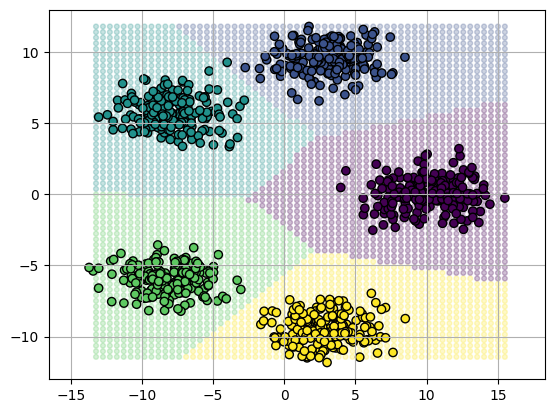

In [35]:
# Just run the following code, do not modify it

D, targets = make_data(k=5, num_instances=1000, radius=10, ratio=2, rotation=0)
G = make_grid(D,n=60)
LDA_params = fit_LDA(D, targets)
preds = test_LDA(G, LDA_params)
plot_data_and_grid(D, targets, G, preds)